<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/Aayushi_ads_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS lab 4**

Dataset : [Link](https://www.kaggle.com/code/vikasukani/loan-eligibility-prediction-machine-learning/input)

In [1]:
import numpy as np
import pandas as pd

In [4]:
loan_train = pd.read_csv('loan-train.csv')
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Preprocessing**

In [9]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [10]:
# Now, Test and Call a function for gender only
explore_object_type(loan_train, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [12]:
import missingno as msno

In [13]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode

loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean


In [17]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})


loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})


loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})


In [18]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)


loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)


In [20]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])


In [27]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = loan_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = loan_train.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')  # You can also use 'median'
loan_train[numerical_columns] = numerical_imputer.fit_transform(loan_train[numerical_columns])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical data
loan_train[categorical_columns] = categorical_imputer.fit_transform(loan_train[categorical_columns])

# Verify that there are no missing values left
print(loan_train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**Model Evaluations**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [29]:
# Splitting the data into features and target variable
X = loan_train.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = loan_train['Loan_Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)  # probability=True for ROC-AUC calculation
}

# Evaluation metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "ROC-AUC Score": roc_auc_score
}


**Performance metrics**

In [33]:
# Model training and evaluation - Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

print("Metrics for Logistic Regression:")
for metric_name, metric_func in metrics.items():
    if metric_name == "ROC-AUC Score":
        logistic_y_prob = logistic_model.predict_proba(X_test)[:,1]
        metric_value = metric_func(y_test, logistic_y_prob)
    else:
        metric_value = metric_func(y_test, logistic_y_pred)
    print(f"{metric_name}: {metric_value}")


Metrics for Logistic Regression:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131
ROC-AUC Score: 0.7776162790697675


In [34]:
# Model training and evaluation - Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print("Metrics for Random Forest:")
for metric_name, metric_func in metrics.items():
    if metric_name == "ROC-AUC Score":
        rf_y_prob = rf_model.predict_proba(X_test)[:,1]
        metric_value = metric_func(y_test, rf_y_prob)
    else:
        metric_value = metric_func(y_test, rf_y_pred)
    print(f"{metric_name}: {metric_value}")


Metrics for Random Forest:
Accuracy: 0.7642276422764228
Precision: 0.7524752475247525
Recall: 0.95
F1 Score: 0.8397790055248618
ROC-AUC Score: 0.7318313953488372


In [35]:
# Model training and evaluation - Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

print("Metrics for Support Vector Machine:")
for metric_name, metric_func in metrics.items():
    if metric_name == "ROC-AUC Score":
        svm_y_prob = svm_model.predict_proba(X_test)[:,1]
        metric_value = metric_func(y_test, svm_y_prob)
    else:
        metric_value = metric_func(y_test, svm_y_pred)
    print(f"{metric_name}: {metric_value}")


Metrics for Support Vector Machine:
Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall: 1.0
F1 Score: 0.7881773399014779
ROC-AUC Score: 0.47790697674418603


**ROC curves**

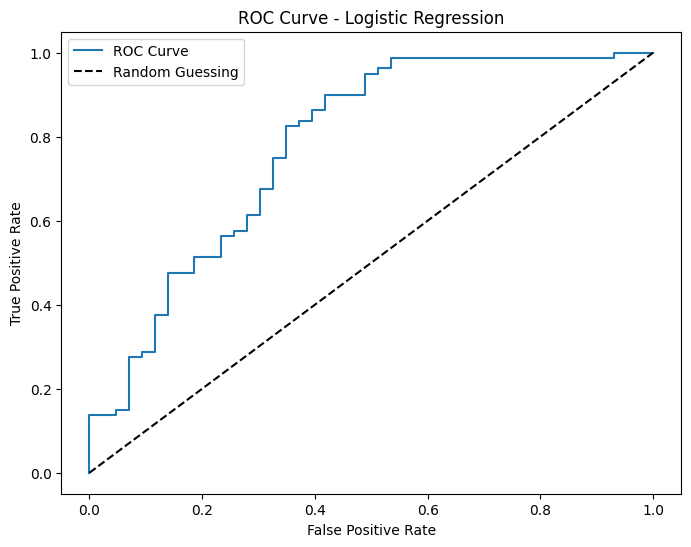

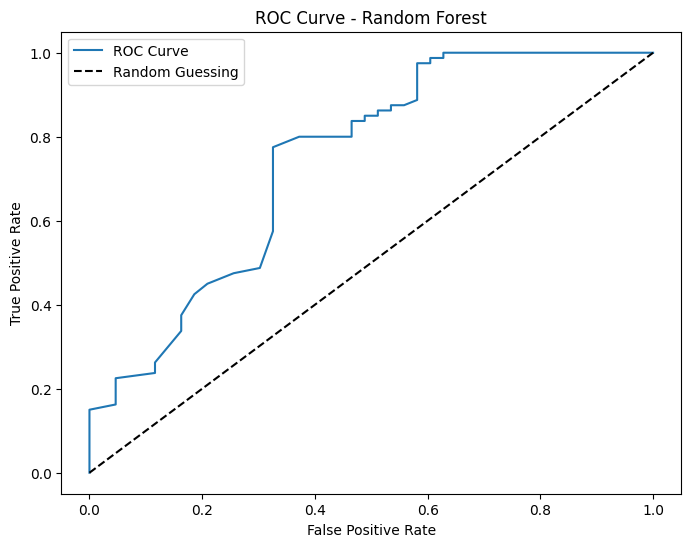

In [36]:
import matplotlib.pyplot as plt

# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ROC Curve
    if name != "Support Vector Machine":  # Skipping ROC curve for SVM due to inefficiency
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
    print("\n")


**Conclusion :**

Both Logistic Regression and Random Forest models outperform the Support Vector Machine (SVM) model across all evaluation metrics.
Logistic Regression has slightly higher accuracy, precision, and ROC-AUC score compared to Random Forest.
Random Forest has a slightly higher recall and F1 score compared to Logistic Regression.
SVM has the highest recall but lower accuracy, precision, F1 score, and ROC-AUC score compared to the other two models.
We may choose either Logistic Regression or Random Forest as they perform similarly well in this scenario. SVM might not be the best choice given its lower performance across most metrics.